In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetic_data.csv")
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# drop columns not needed
df[df == "?"] = np.nan
df = df.drop(["encounter_id","weight", "medical_specialty","patient_nbr"],axis=1)

In [4]:
def binary_readmitted(elem):
    if(elem == "<30"):
        return 1
    return 0
df["readmitted"] = df["readmitted"].apply(binary_readmitted)

In [5]:
string_columns = [
    "race",
    "gender",
    "age",
    "max_glu_serum",
    "A1Cresult",
    "metformin",
    "repaglinide",
    "payer_code",
    "diag_1",
    "diag_2",
    "diag_3",
    "nateglinide",
    "chlorpropamide",
    "glimepiride",
    "acetohexamide",
    "glipizide",
    "glyburide",
    "tolbutamide",
    "pioglitazone",
    "rosiglitazone",
    "acarbose",
    "miglitol",
    "troglitazone",
    "tolazamide",
    "examide",
    "citoglipton",
    "insulin",
    "glyburide-metformin",
    "glipizide-metformin",
    "glimepiride-pioglitazone",
    "metformin-rosiglitazone",
    "metformin-pioglitazone",
    "change",
    "diabetesMed"]
df_dummies = pd.get_dummies(df[string_columns],drop_first=True)
df = df.drop(string_columns,axis=1)

In [6]:
df_dummies

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
101763,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
101764,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   admission_type_id         101766 non-null  int64
 1   discharge_disposition_id  101766 non-null  int64
 2   admission_source_id       101766 non-null  int64
 3   time_in_hospital          101766 non-null  int64
 4   num_lab_procedures        101766 non-null  int64
 5   num_procedures            101766 non-null  int64
 6   num_medications           101766 non-null  int64
 7   number_outpatient         101766 non-null  int64
 8   number_emergency          101766 non-null  int64
 9   number_inpatient          101766 non-null  int64
 10  number_diagnoses          101766 non-null  int64
 11  readmitted                101766 non-null  int64
dtypes: int64(12)
memory usage: 9.3 MB


In [8]:
df = df.join(df_dummies)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 2349 entries, admission_type_id to diabetesMed_Yes
dtypes: int64(12), uint8(2337)
memory usage: 236.1 MB


In [106]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [15]:
# split the data
y = df["readmitted"].values
X = df.drop(["readmitted"],axis=1).values

X_train,X_test,y_train,y_test = train_test_split(X[1:500],y[1:500],random_state=42,test_size=0.3)

In [107]:
# xgb.XGBClassifier(objective="binary:logistic", n_estimators=50, seed=123, num_boosting_rounds=50
# params = {
#     "learning_rate": np.arange(.05, 1, .05),
#     "max_depth": np.arange(1,10, 1),
#     "num_boosting_rounds": [50],
#     "min_child_weight": [1,3,4],
#     "max_delta_step": [0,1,3,4],
#     "subsample": np.arange(.05, 1, .05),
# }
params = {'subsample': 0.2,
 'objective': 'binary:logistic',
 'num_boosting_rounds': 500,
 'n_estimators': 50,
 'min_child_weight': 1,
 'max_delta_step': 4,
 'learning_rate': 0.9500000000000001}
model = xgb.XGBClassifier(seed=42, **params)
model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.9500000000000001, max_delta_step=4,
              n_estimators=50, num_boosting_rounds=500, seed=42, subsample=0.2)

In [108]:
y_pred = model.predict(X_test)
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.853333


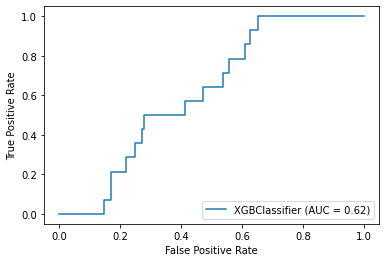

In [109]:
plot_roc_curve(model,X_test,y_test)